Исходные данные:  [303, 521, 479, 459, 304, 280, 552, 463, 250, 437, 272, 322, 269, 486, 457, 764, 1086, 1169, 821, 1358, 1182, 690, 830, 1277, 1233, 1195, 1128, 730, 654, 407, 413, 431, 313, 782, 512, 499, 569, 811, 813, 827, 516, 401]
Возможное количество кластеров:  4
Начальная главная точка 1: 388
Начальная главная точка 2: 664
Начальная главная точка 3: 940
Начальная главная точка 4: 1216

Найдено кластеров:  3
Центр 1-го кластера: 379
Центр 2-го кластера: 659
Центр 3-го кластера: 1028


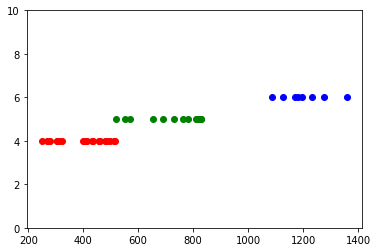

In [1]:
# Описание задачи:
# На вход программы подаются неупорядоченные числа
# Необходимо определить центры (главные точки) групп (кластеров) этих чисел
# Определить количество таких групп, и главные точки кластеров 
# 
# В алгоритме k-средних для определения координат главных точек используется критерий расстояния
# Критерий расстояния зависит от мерности пространства и типа дисперсии в распределении
# и является колмогоровским средним соответствующим конкретной мерности и дисперсии
# В примерах, в качестве критерия обычно используется сумма квадратов расстояний, а нахождение
# главных точек достигается нахождением такой точки, когда критерий между главной точкой и
# остальными (неподвижными координатами элементов множества) точками кластера - минимален
# Минимизируют этот критерий - последовательно перемещая главную точку в наиболее подходящие положения
# 
# Описание алгоритма:
# 1.упорядочть множество
# 2.определить границы множества (минимум и максимум)
# 3.подсчитать кол-во элементов N
# 4.определить по сколько в каждом кластере должно быть элементов n
# 5.порезать упорядоченное множество на k кусков
# 6.расставить главные точки в середине каждого куска (это метод сетки)
# или расставить главные точки случайным образом (метод Монте-Карло)
# 7.двигать точки туда, где критерий расстояния до n элементов меньше
# 8.если критерий расстояния перестал уменьшаться - точка в центре кластера (больше не двигаем)
# 9.когда все точки в центрах кластеров - прекратить движение
# 10. удалить дублирующиеся главные точки - алгоритм завершён

#Текст программы:


числа = [303, 521, 479, 459, 304, 280, 552, 463, 250, 437, 272, 322, 269, 486, 457,
     764, 1086, 1169, 821, 1358, 1182, 690, 830, 1277, 1233, 1195, 1128, 730,
     654, 407, 413, 431, 313, 782, 512, 499, 569, 811, 813, 827, 516, 401]

k = 4 # предполагаемое количество кластеров
главная_точка = [0] * k  # массив из k нулевых значений

данные = sorted(числа)  # сортируем множество по возрастанию
левая_граница = min(данные)  # находим левую границу для сетки
правая_граница = max(данные) # находим правую границу для сетки
кусок = ((правая_граница - левая_граница)//k)//2 # находим половину расстояния между узлами сетки

print("Исходные данные: ", числа) # выводим начальные данные
print("Возможное количество кластеров: ", k) # выводим предполагаемое количество кластеров

for i in range(k):  # для k главных точек
    главная_точка[i] = левая_граница + кусок + (2 * i * кусок)  # расставляем точки в узлах сетки
    
N = len(данные)  # подсчитываем количество элементов множества данных
n = N // k       # подсчитываем примерное количество элементов в кластере
# выполнены пункты алгоритма 1-7
# можно приступать к движению точек

for i in range(k):
    print ("Начальная главная точка "+str(i+1)+":", главная_точка[i]) # выводим предполагаемые главные точки

сделано = 0 # счётчик главных точек, для которых найдены центры кластеров
S = [0] * N # расстояния от главной точки до n ближайших
Q = [0] * N # критерии расстояния до точек n (например при нормальном распределении - квадрат расстояния)
i = 0

while сделано < k: # бесконечный цикл движения точек к центрам кластеров пока все точки не обработаны 
    t = главная_точка[i] # координата i-той главной точки
    m = 0
    
    # ищем точку ближайшую к главной
    for j in range(N): # для всех точек множества
        S[j] = abs(t - данные[j]) # вычислям расстояние до главной точки
        
    for j in range(N): # для всех точек множества
        if S[j] == min(S): # находим точку ближайшую к главной
            m = j # запоминаем её местоположение
            break # завершаем поиск ближайшей точки
        
    # определяем примерные границы кластера    
    l_gr = m - n // 2 + 1 # определяем примерно левую границу кластера
    p_gr = l_gr + n # определяем примерно правую границу кластера
    if l_gr < 0: # проверяем, не вышли ли за границы массива слева
        l_gr = 0 # если вышли корректируем левую границу
        p_gr = l_gr + n # и правую границу
    if p_gr > N: # проверяем, не вышли ли за границы массива справа
        p_gr = N # если вышли корректируем правую границу
        l_gr = p_gr - n # и левую границу
        
    # вычисляем критерии расстояния для текущей и сдвинутых главных точек    
    for j in range(l_gr,p_gr): # для всех точек кластерного подмножества
        Q[j] = (t - данные[j])*(t - данные[j]) # вычисляем критерий расстояния
        csq = sum(Q) # подсчитываем текущий суммарный критерий расстояния
    t = t - 1 # смещаем главную точку влево
    for j in range(l_gr,p_gr): # для всех точек кластерного подмножества
        Q[j] = (t - данные[j])*(t - данные[j]) # вычисляем критерий расстояния
        lsq = sum(Q) # подсчитываем левый суммарный критерий расстояния
    t = t + 2 # смещаем главную точку вправо
    for j in range(l_gr,p_gr): # для всех точек кластерного подмножества
        Q[j] = (t - данные[j])*(t - данные[j]) # вычисляем критерий расстояния
        rsq = sum(Q) # подсчитываем правый суммарный критерий расстояния
    
    # двигаем главную точку
    if lsq > csq and rsq > csq: # если левый и правый критерии хуже, чем текущий
        сделано = сделано + 1 # отмечаем, что центр данного кластера определён
        i = i + 1 # увеличиваем номер текущего кластера
        continue # и переходим к следующему кластеру
    if lsq < csq: # если левый критерий лучше, чем текущий
        главная_точка[i] = главная_точка[i] - 1 # смещаем главную точку влево
    if rsq < csq: # если правый критерий лучше, чем текущий
        главная_точка[i] = главная_точка[i] + 1 # смещаем главную точку вправо
        
# удаляем дублирующиеся главные точки
главные_точки = []  # пустой массив для конечного результата
for i in range(k): # для всех найденых главных точек 
    if главная_точка[i] not in главные_точки: # если точка ещё не в списке
        главные_точки.append(главная_точка[i]) # добавляем её в список

print ("\nНайдено кластеров: ", len(главные_точки)) # выводим количество найденых кластеров
for i in range(len(главные_точки)): # для всего списка главных точек
    print("Центр "+str(i+1)+"-го кластера:", главные_точки[i]) # выводим координаты главных точек
    
# определяем границы кластеров
границы_кластеров = [] # пустой массив для значений границ
for i in range(len(главные_точки)-1): # для всех пар главных точек
    границы_кластеров.append((главные_точки[i] + главные_точки[i+1])//2) # вычисление и добавление границы
границы_кластеров.append(max(данные) + 1) # добавляем правую границу последнего кластера

# =============отрисовываем картинки кластеров===============================
import matplotlib.pyplot as plt # подключаем библиотеку математической графики
# для использования библиотеки она должна быть установлена в текущую версию python
# установка производится вводом консольной команды ОС: pip install matplotlib

colors=['ro','go','bo','yo','mo','co','ko'] # список стандартных цветов matplotlib

текущий_кластер = 0 # начиная с первого кластера
for i in range (len(данные)): # для всех элементов множества
    x = [] # пустая координата X
    y = [] # пустая координата Y
    цвет = colors[текущий_кластер] # цвет и форма отрисовки элементов кластера
    x.append(данные[i]) # заносим в X i-тый элемент множества данных
    y.append(4 + текущий_кластер) # задаём свою координату Y для каждого кластера 

    if данные[i] < границы_кластеров[текущий_кластер]: # если не пересекли границу текущего кластера
        plt.plot(x, y, цвет) # отрисовываем элемент множества текущим цветом
    else: # если пересекли границу текущего кластера
        текущий_кластер = текущий_кластер + 1 # увеличиваем номер текущего кластера
        цвет = colors[текущий_кластер] # выбираем из списка следующий цвет
        y=[] # пустая координата Y
        y.append(4 + текущий_кластер) # задаём свою координату Y для текущего кластера 
        plt.plot(x, y, цвет) # отрисовываем элемент множества выбранным цветом
оси = [] # пустые границы координатных осей
оси.append (min(данные) - (max(данные)-min(данные)) // 20) # левая граница координат с 5% запасом
оси.append (max(данные) + (max(данные)-min(данные)) // 20) # правая граница координат с 5% запасом
оси.append (0) # нижняя граница координат
оси.append (10) # верхняя граница координат
plt.axis(оси) # задаём координатные оси

plt.show() # выводим изображение кластеров на экран    
    
# Задание:
# 1. добавьте изображения главных точек кластеров в виде чёрных кругов
# 2. добавьте изображения начальных значений главных точек в виде синих треугольников
# 3. добавьте изображения границ кластеров в виде чёрных квадратов
    


